# Harmonic Analysis - Monthly Mean Temperature

***[Harmonic analysis](https://en.wikipedia.org/wiki/Harmonic_analysis)*** is a branch of mathematics concerned with the representation of functions or signals as the superposition of basic waves, and the study of and generalization of the notions of Fourier series and Fourier transforms (i.e. an extended form of Fourier analysis).

Many applications of harmonic analysis in science and engineering begin with the idea or hypothesis complex problems could be reduced to manageable terms by the technique of breaking complicated mathematical curves into sums of comparatively simple components. 

Various researchers of climatology and meteorology have suggested that the harmonic analysis is advantageous to study the seasonal variation or oscillation of meteorological or climatological parameters. The development and the mathematical formulation of the method of harmonic analysis have been discussed by a good number of researchers in study of different climatological parameters like as Azzali and Menenti (2001), Yuan and Li (2008), van Loon (1967), Meehl (2006), Goswami (2000).

In this study, the ***[monthly mean temperature](http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_nccObsCode=36&p_display_type=dataFile&p_startYear=&p_c=&p_stn_num=063254/)*** data downloaded from the BOM of Australia are used in the harmonic analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from HA_helpers import *
%matplotlib inline

In [2]:
# Set some parameters to apply to all plots. These can be overridden
import matplotlib
# Plot size to 12" x 7"
matplotlib.rc('figure', figsize = (15, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

## 1. Read data

The site location information:
- Lat: 33.32° S 
- Lon: 149.08° E
- Elevation: 922 m.

Use ***pandas*** to import the data from the CSV file and add a datetime index.

In [3]:
df = pd.read_csv('data\Orange.csv',
                  usecols=[4],                  
                 )
df.columns = ['Tmean']
df.index   = pd.date_range('1976-01', '2019-01', freq='M')
df = df['1976':'2018']

## 2. Carry out harmonic analysis

We now compute the Fourier transform and the spectral density of the signal. 

### 2.1 Calculate the Fourier Transform

using scipy.fftpack to get Coefficients and Wave frequency. Because we use monthly data, so set the sampling frequency as 1/12.

In [4]:
fft, freq = fourier_transform(df[['Tmean']].values[:,0], 1/12.)

### 2.2 Calculate the spectral density

We now plot the power spectral density of our signal, as a function of the frequency. we observe a peak for ***f=44***. Now, we cut out frequencies higher than the fundamental frequency.

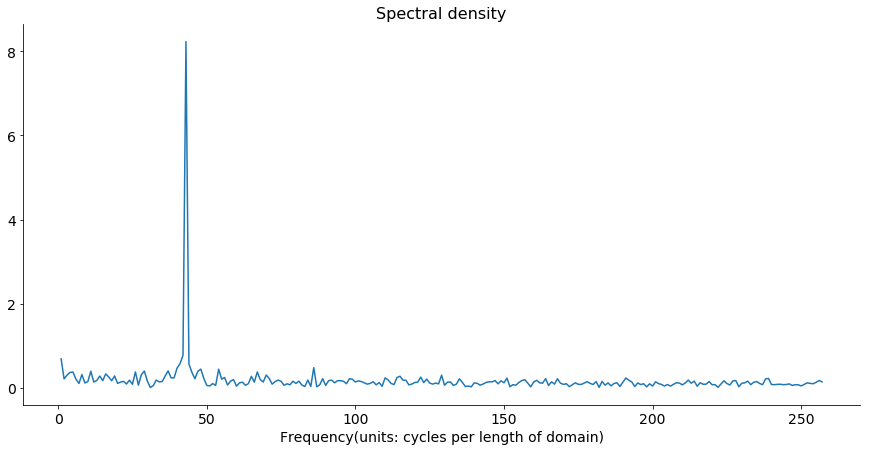

In [5]:
spd, pos_freqs = spectrum(fft, freq)

f, ax = plt.subplots(1,1)
ax.plot(pos_freqs, spd)
_ = ax.set_xlabel('Frequency(units: cycles per length of domain)', fontsize=14)
_ = ax.set_title('Spectral density', fontsize=16)

### 2.3 Inverse Fourier Transform

Perform an inverse FFT to convert the modified Fourier transform back to the temporal domain. This way, we recover a signal that mainly contains the fundamental frequency (***cutofff = 44***)

In [6]:
data_f = np.real(inverse_fourier_transform(fft, freq, max_freq=44))
df['Tmean_fft'] = data_f

## 3. Visualize

Here, the Hilbert transform is applied, which excludes the negative part of the fft spectrum.

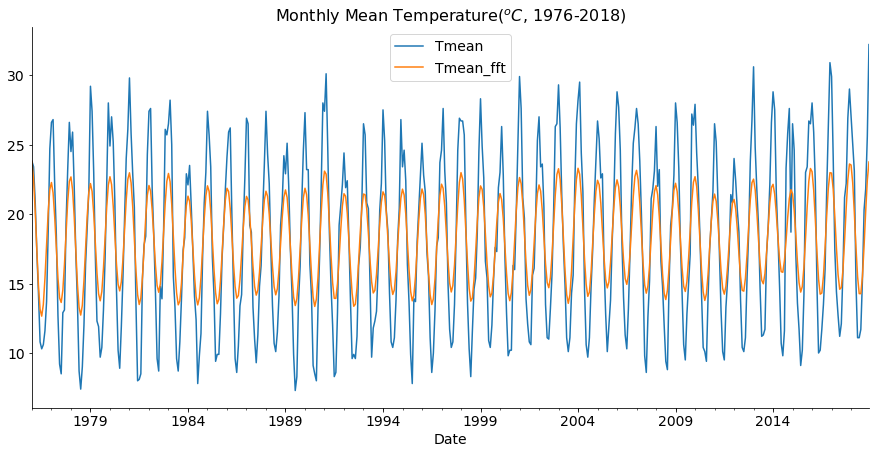

In [7]:
ax = df[['Tmean', 'Tmean_fft']].plot()
_ = ax.set_xlim(df.index.min(), df.index.max())
_ = ax.set_xlabel('Date')
_ = ax.set_title('Monthly Mean Temperature($^oC$, 1976-2018)', fontsize=16)

## Summary and discussion

In this notebook, we show how to use a Fast Fourier Transform (FFT) to carry out a harmonic analysis on a monthly mean temperature time series.

We can recover the initial signal with an Inverse Fast Fourier Transform that computes an Inverse Discrete Fourier Transform (IDFT). The Discrete Fourier Transform  is useful when periodic patterns are to be found. However, generally speaking, the Fourier transform cannot detect transient changes at specific frequencies. Local spectral methods are required, such as the wavelet transform.

Harmonic analysis is a kind of  very efficient tools to compress, store data and reconstruct data. In such a case, it is  very similar to the method of EOF analysis. In fact, the EOF method is similar in spirit to harmonic analysis, but harmonic analysis typically uses predetermined orthogonal functions, for example, sine and cosine functions at fixed frequencies. In some cases the two methods may yield essentially the same results.

## References

Azzali S, Menenti M. 2001. Mapping vegetation-soil-climate complexes in southern Africa using temporal fourier analysis of
NoaaAvhrr Ndvi data. International Journal of Remote Sensing 21: 973–996.

Yuan X, Li C. 2008. Climate modes in southern high latitudes and their impacts on antarctic sea ice. Journal of Geophysical
Research 113(C6):, DOI:10.1029/2006JC004067.

van Loon H. 1967. The Half-Yearly Oscillations in Middle and High Southern Latitudes and the Coreless Winter. Journal of the
Atmospheric Sciences 24: 472–486.

Meehl GA, Washington WM, Santer BD, Collins WD, Arblaster JM, Hu A, Lawrence DM, Teng H, Buja LE, Strand WG. 2006.
Climate change projections for the twenty-first century and climate change commitment in the ccsm3. Journal of Climate 19(11): 2121–2632.

U. D. Goswami, a study on some features of surface air temperature over Assam, M. Ph. Dissertation, Gauhati University (2000).

IPython Cookbook, Second Edition, by Cyrille Rossant, Packt Publishing 2018